<a href="https://colab.research.google.com/github/Kosadabhat/Kosada-Bhat-ElevateLabs-TASK2/blob/main/Kosada_Bhat_Task2_ElevateLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis(EDA)**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
import os
import pandas as pd
print("Files in dataset directory:", os.listdir(path))

Files in dataset directory: ['Titanic-Dataset.csv']


In [3]:
df = pd.read_csv(os.path.join(path, "Titanic-Dataset.csv"))
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.head())
print(df.info())  # Data types, non-null counts
print(df.shape)   # Dimensions


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
# Numerical summary
print(df.describe())

# Categorical summary
print(df.describe(include='object'))


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
                       Name   Sex  Ticket Cabin Embarked
count                   

**Missing Value Analysis**

Age         177
Cabin       687
Embarked      2
dtype: int64


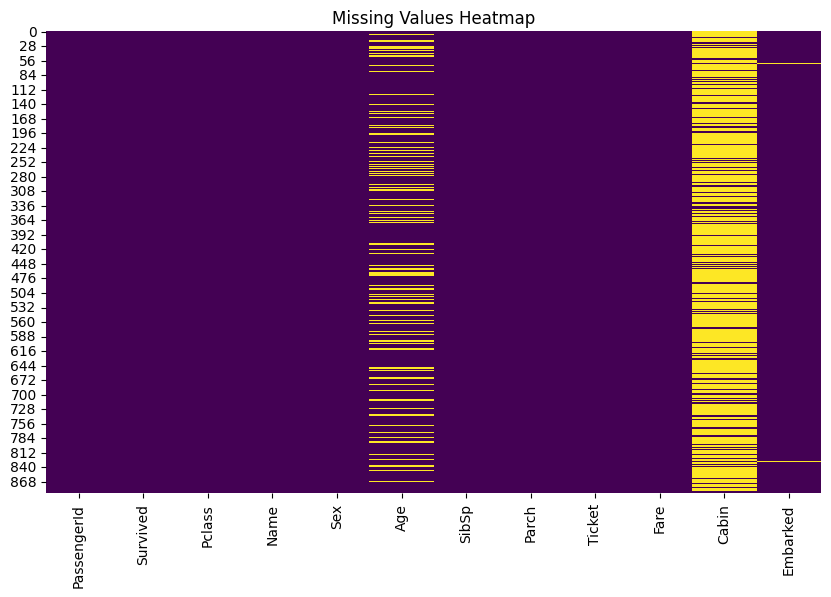

In [7]:
# Total missing values per column
missing = df.isnull().sum()
print(missing[missing > 0])

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Univariate Analysis (Distribution of Individual Features)

Numeric Variables: Histograms & Boxplots

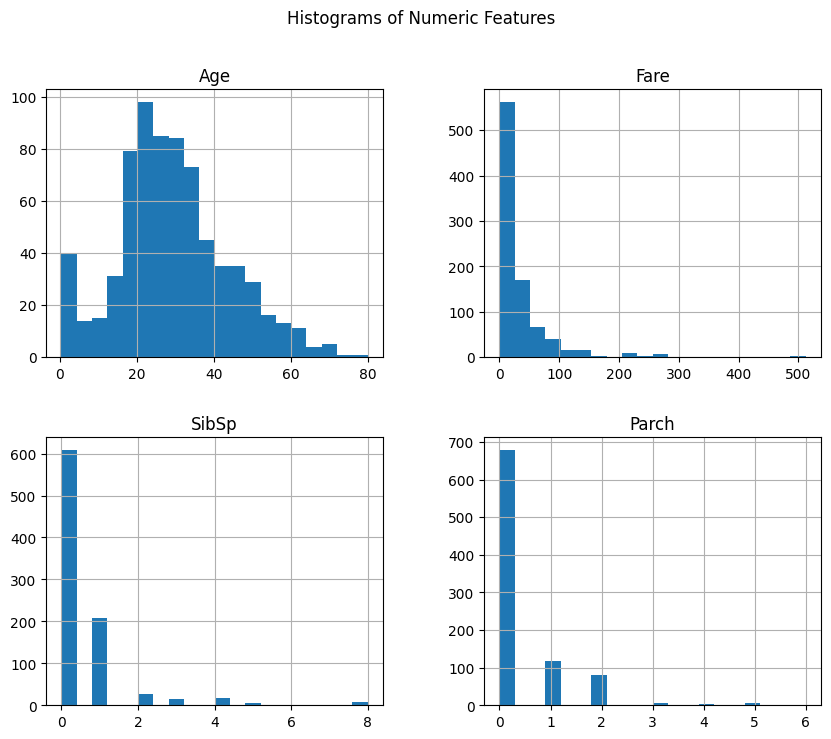

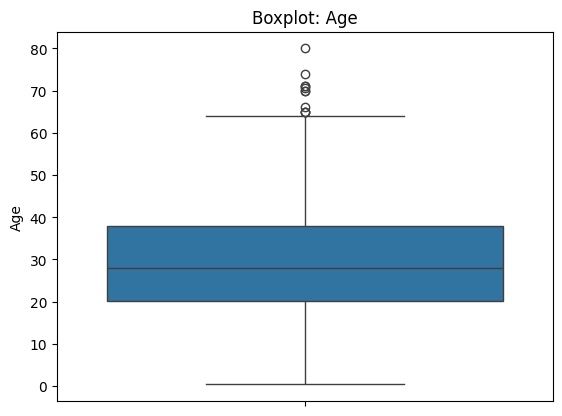

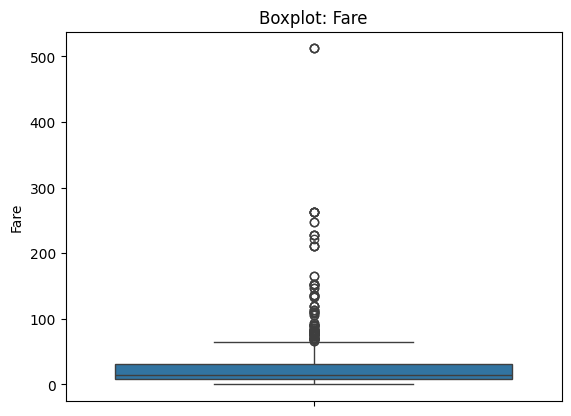

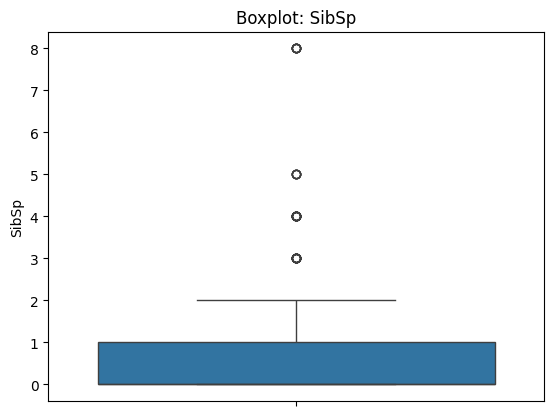

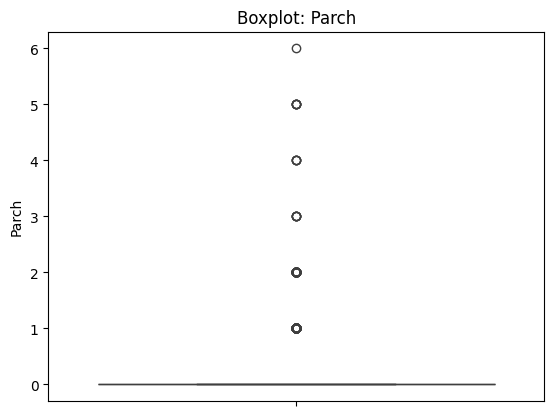

In [8]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
df[numeric_features].hist(figsize=(10, 8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Boxplots
for col in numeric_features:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
    plt.show()


Categorical Variables: Count Plots



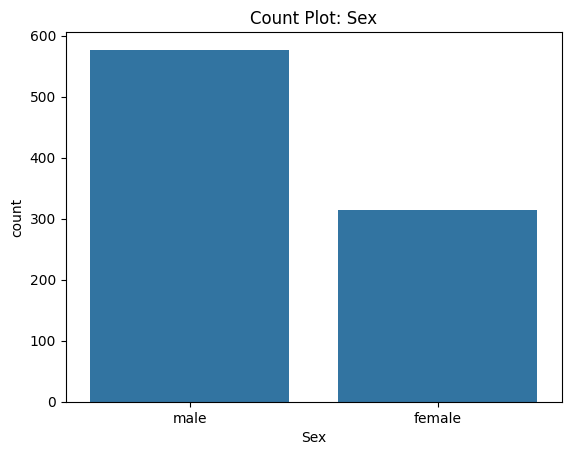

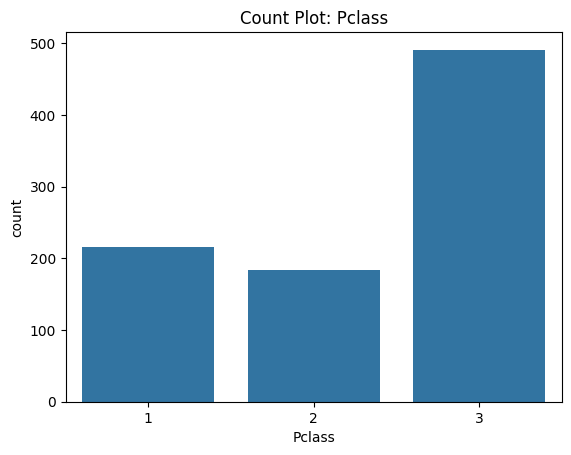

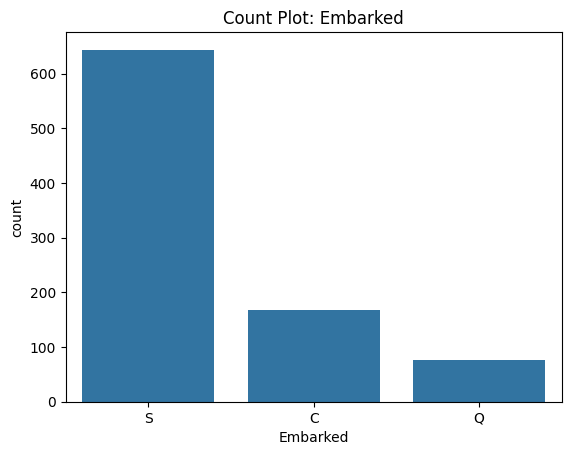

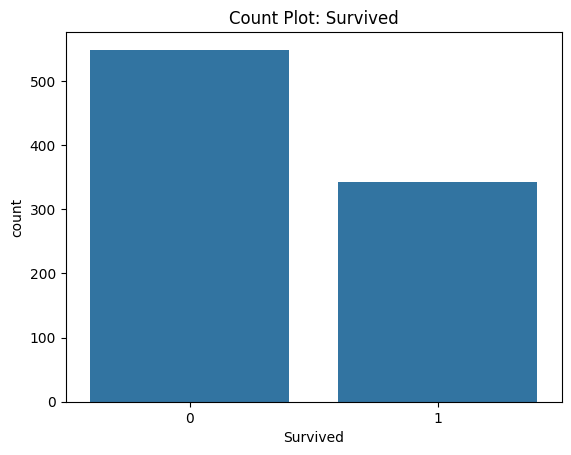

In [9]:
categorical_features = ['Sex', 'Pclass', 'Embarked', 'Survived']

for col in categorical_features:
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot: {col}')
    plt.show()


Bivariate Analysis (Target vs Features)

Survival vs Categorical Features

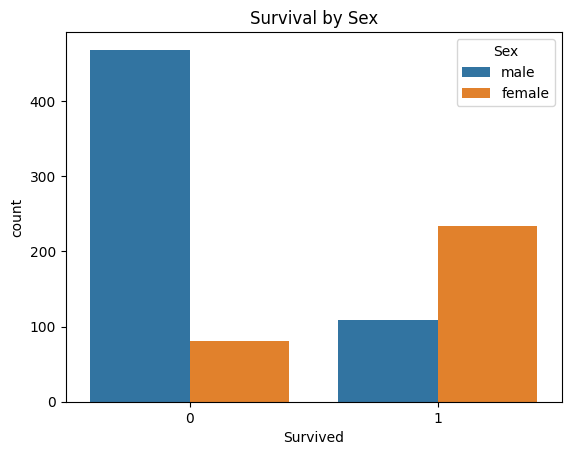

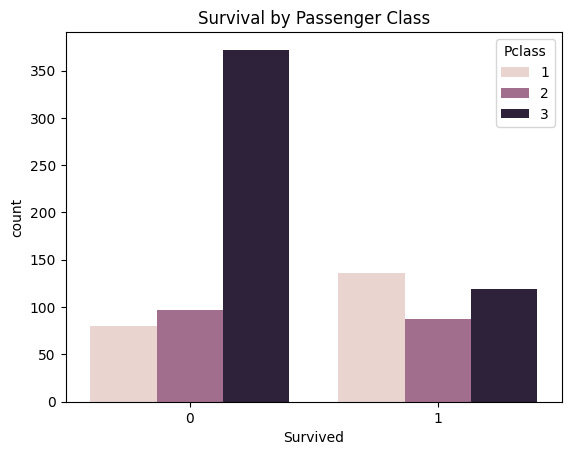

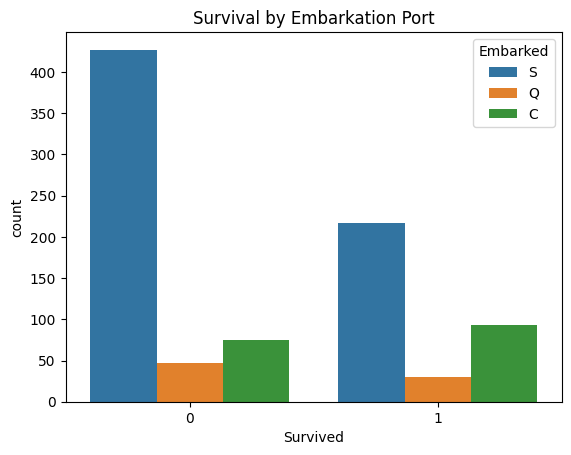

In [10]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Sex")
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title("Survival by Embarkation Port")
plt.show()

 Survival vs Numeric Features

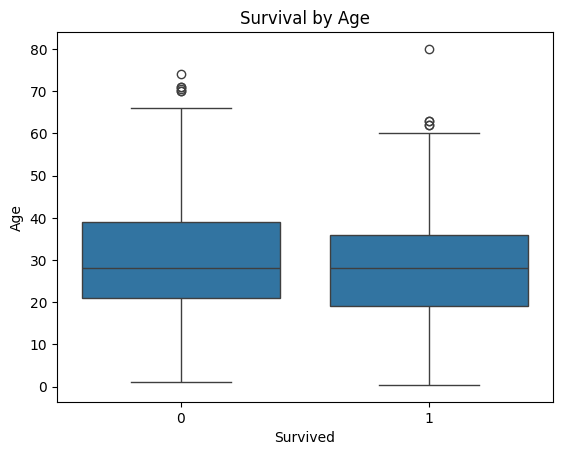

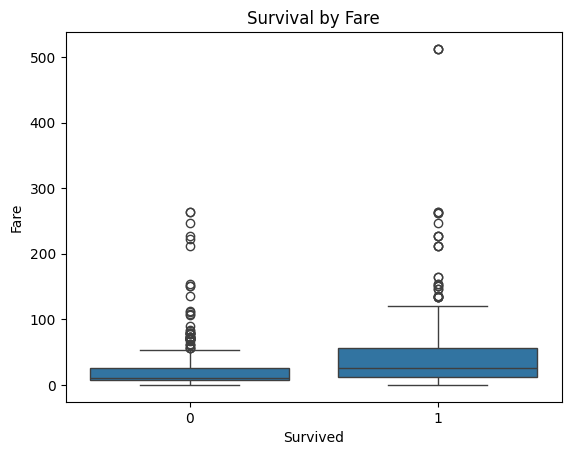

In [11]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Survival by Age")
plt.show()

sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Survival by Fare")
plt.show()

**Correlation and Relationships**

Correlation Matrix (Numerical)

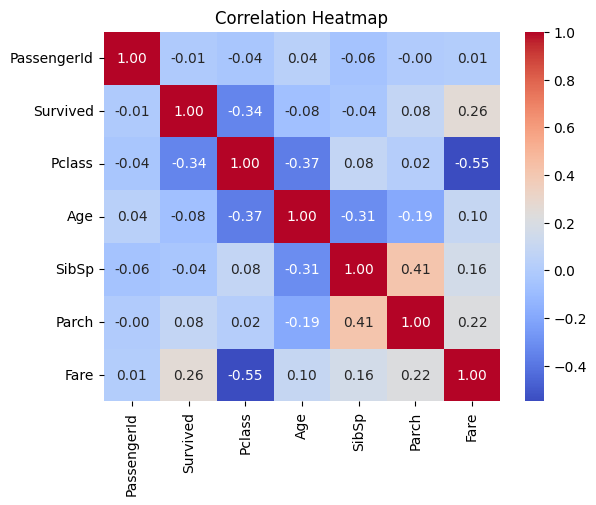

In [12]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

 Pairplot (Visual Relationship)

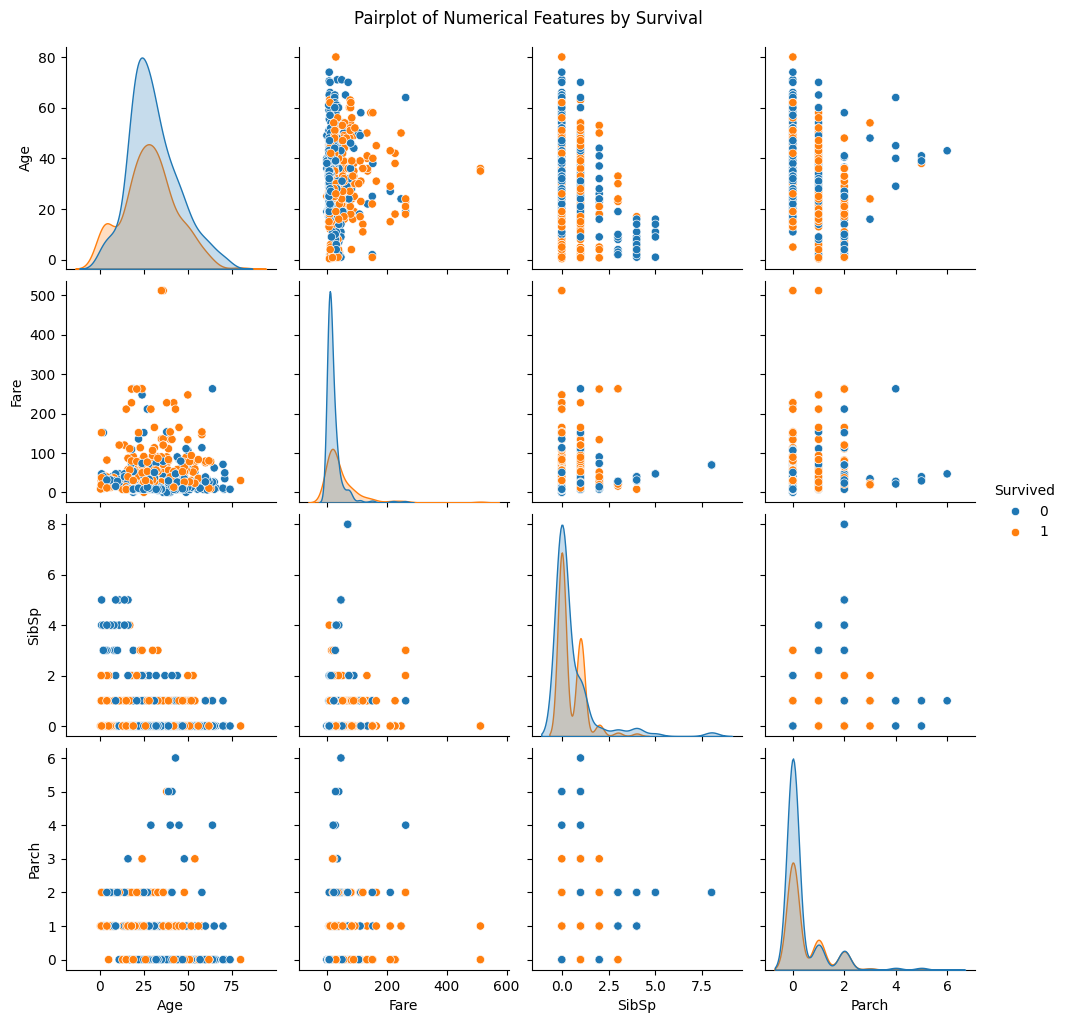

In [13]:
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle("Pairplot of Numerical Features by Survival", y=1.02)
plt.show()

**Outlier Detection and Handling**

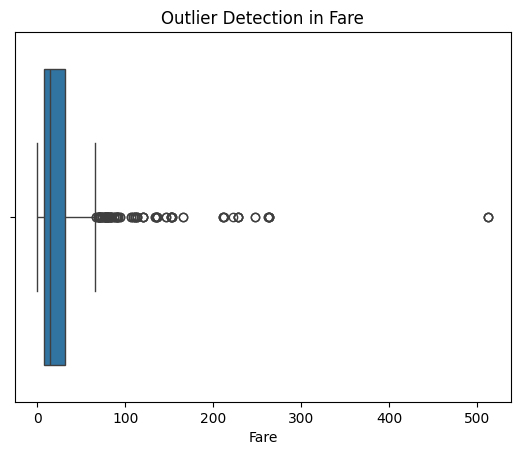

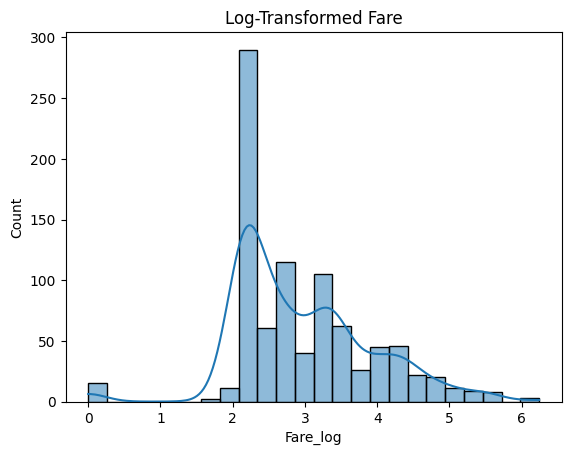

In [14]:
# Outliers in Fare
sns.boxplot(x=df['Fare'])
plt.title("Outlier Detection in Fare")
plt.show()

# Log-transform skewed Fare for better visualization
import numpy as np
df['Fare_log'] = np.log1p(df['Fare'])

sns.histplot(df['Fare_log'], kde=True)
plt.title("Log-Transformed Fare")
plt.show()

**KEY INFERENCES:**


*   Sex:

1.  Females had a significantly higher survival rate than males.
2.  Gender is one of the strongest predictors of survival.

*   Pclass (Passenger Class):

1.  1st class passengers had the highest survival rate.
2.  Survival probability decreases with lower class (1st > 2nd > 3rd).
3.  Reflects socioeconomic disparities and access to lifeboats.

*   Age:

1.  Younger passengers, especially children under 10, were more likely to survive.
2.  Survivors generally had a lower median age than non-survivors.
3.  There is variability and overlap, so age is a moderate predictor.


*   Fare:

1.  Higher fare values are associated with better survival chances.
2.  Strong correlation between fare and class (high fare → higher class).
3.  Fare distribution is skewed; log transformation improves visualization and modeling.

*   Embarked:

1.  Passengers who boarded at Cherbourg (C) had the highest survival rate.
2.  Differences may be due to class and demographic distributions at each port.


*   SibSp & Parch (Family Aboard):

1.  Passengers with 1-2 family members had higher survival rates.
2.  Solo travelers and those with large families were less likely to survive.
3.  Small family groups might have facilitated better cooperation during evacuation.
